In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dfresid = pd.read_csv('public_data/both_residuals.csv', index_col=0)

In [82]:
print(dfresid.sort_values(by='xgb_residual')[:25][['county_state', 
                    'xgb_residual']].set_index('county_state').to_markdown())

| county_state                     |   xgb_residual |
|:---------------------------------|---------------:|
| Forest County, Pennsylvania      |      -3950.66  |
| Greensville County, Virginia     |      -2412.21  |
| North Slope Borough, Alaska      |      -2378.68  |
| Wheeler County, Georgia          |      -1994.88  |
| Manassas city, Virginia          |      -1881.26  |
| Issaquena County, Mississippi    |      -1878.01  |
| Powell County, Montana           |      -1850.93  |
| Stewart County, Georgia          |      -1838.78  |
| Jones County, Texas              |      -1570.68  |
| Buena Vista County, Iowa         |      -1511.32  |
| DeKalb County, Missouri          |      -1286.27  |
| Lee County, Kentucky             |      -1265.57  |
| Emmet County, Iowa               |      -1248.64  |
| Union County, Florida            |      -1194.15  |
| Duplin County, North Carolina    |      -1173.87  |
| New York County, New York        |      -1106.6   |
| Ector County, Texas       

| Most under-predicted counties    |   Prediction Error |
|:---------------------------------|---------------:|
| Forest County, Pennsylvania      |      -3950.66  |
| Greensville County, Virginia     |      -2412.21  |
| North Slope Borough, Alaska      |      -2378.68  |
| Wheeler County, Georgia          |      -1994.88  |
| Manassas city, Virginia          |      -1881.26  |
| Issaquena County, Mississippi    |      -1878.01  |
| Powell County, Montana           |      -1850.93  |
| Stewart County, Georgia          |      -1838.78  |
| Jones County, Texas              |      -1570.68  |
| Buena Vista County, Iowa         |      -1511.32  |
| DeKalb County, Missouri          |      -1286.27  |
| Lee County, Kentucky             |      -1265.57  |
| Emmet County, Iowa               |      -1248.64  |
| Union County, Florida            |      -1194.15  |
| Duplin County, North Carolina    |      -1173.87  |
| New York County, New York        |      -1106.6   |
| Ector County, Texas              |      -1047.72  |
| Petersburg city, Virginia        |      -1008.12  |
| Sevier County, Arkansas          |       -963.681 |
| Tunica County, Mississippi       |       -952.414 |
| San Francisco County, California |       -934.171 |
| Lincoln County, Colorado         |       -930.412 |
| Arlington County, Virginia       |       -898.588 |
| Greene County, North Carolina    |       -867.263 |
| Alexandria city, Virginia        |       -861.727 |

In [85]:
print(dfresid.sort_values(by='xgb_median_residual')[:30][['county_state', 
                    'xgb_median_residual']].set_index('county_state').to_markdown())

| county_state                     |   xgb_median_residual |
|:---------------------------------|----------------------:|
| Forest County, Pennsylvania      |             -1973.75  |
| North Slope Borough, Alaska      |             -1235.87  |
| Greensville County, Virginia     |             -1037.59  |
| Wheeler County, Georgia          |              -999.541 |
| Issaquena County, Mississippi    |              -985.53  |
| Powell County, Montana           |              -971.988 |
| Lee County, Kentucky             |              -679.308 |
| DeKalb County, Missouri          |              -673.823 |
| Stewart County, Georgia          |              -667.461 |
| Emmet County, Iowa               |              -665.441 |
| Buena Vista County, Iowa         |              -595.865 |
| Union County, Florida            |              -576.649 |
| Jones County, Texas              |              -549.259 |
| Ector County, Texas              |              -536.767 |
| Lincoln County, Colora

| county_state                     |   xgb_median_residual |
|:---------------------------------|----------------------:|
| Forest County, Pennsylvania      |             -1973.75  |
| North Slope Borough, Alaska      |             -1235.87  |
| Greensville County, Virginia     |             -1037.59  |
| Wheeler County, Georgia          |              -999.541 |
| Issaquena County, Mississippi    |              -985.53  |
| Powell County, Montana           |              -971.988 |
| Lee County, Kentucky             |              -679.308 |
| DeKalb County, Missouri          |              -673.823 |
| Stewart County, Georgia          |              -667.461 |
| Emmet County, Iowa               |              -665.441 |
| Buena Vista County, Iowa         |              -595.865 |
| Union County, Florida            |              -576.649 |
| Jones County, Texas              |              -549.259 |
| Ector County, Texas              |              -536.767 |
| Lincoln County, Colorado         |              -484.992 |
| Petersburg city, Virginia        |              -458.695 |
| Sevier County, Arkansas          |              -449.579 |
| Val Verde County, Texas          |              -431.273 |
| Bailey County, Texas             |              -424.419 |
| San Francisco County, California |              -397.324 |
| Johnson County, Nebraska         |              -397.154 |
| Scott County, Iowa               |              -387.884 |
| Woodford County, Kentucky        |              -379.676 |
| Greene County, North Carolina    |              -375.435 |
| Bent County, Colorado            |              -370.356 |
| La Paz County, Arizona           |              -367.265 |
| Calhoun County, Texas            |              -362.073 |
| Midland County, Texas            |              -352.246 |
| Loving County, Texas             |              -350.269 |
| Geary County, Kansas             |              -344.643 |

In [45]:
dff = pd.read_csv('public_data/xg_importances.csv', index_col=0, keep_default_na=False)

In [48]:
features_all_mi = sorted(list(zip(dff.Feature, dff.Importance)), key=lambda x: x[1])

In [51]:
def plot_features(top, mi):
    plt.figure(figsize=(9,18))
    plt.style.use('default')
#     plt.title('{} top {} features from 2018 US Census county estimates with \n\
#     the greatest predictive power for COVID-19 cases per 100,000 people'.format(
#         model_name, top))
             #  fontsize=20)
    x = [str(p[0]) for p in mi][-top:]
    x = [features[k] if k in features else k for k in x]
    y = [p[1] for p in mi][-top:]
    sns.barplot(y[::-1], x[::-1], alpha=0.8)
    plt.grid(0.2)

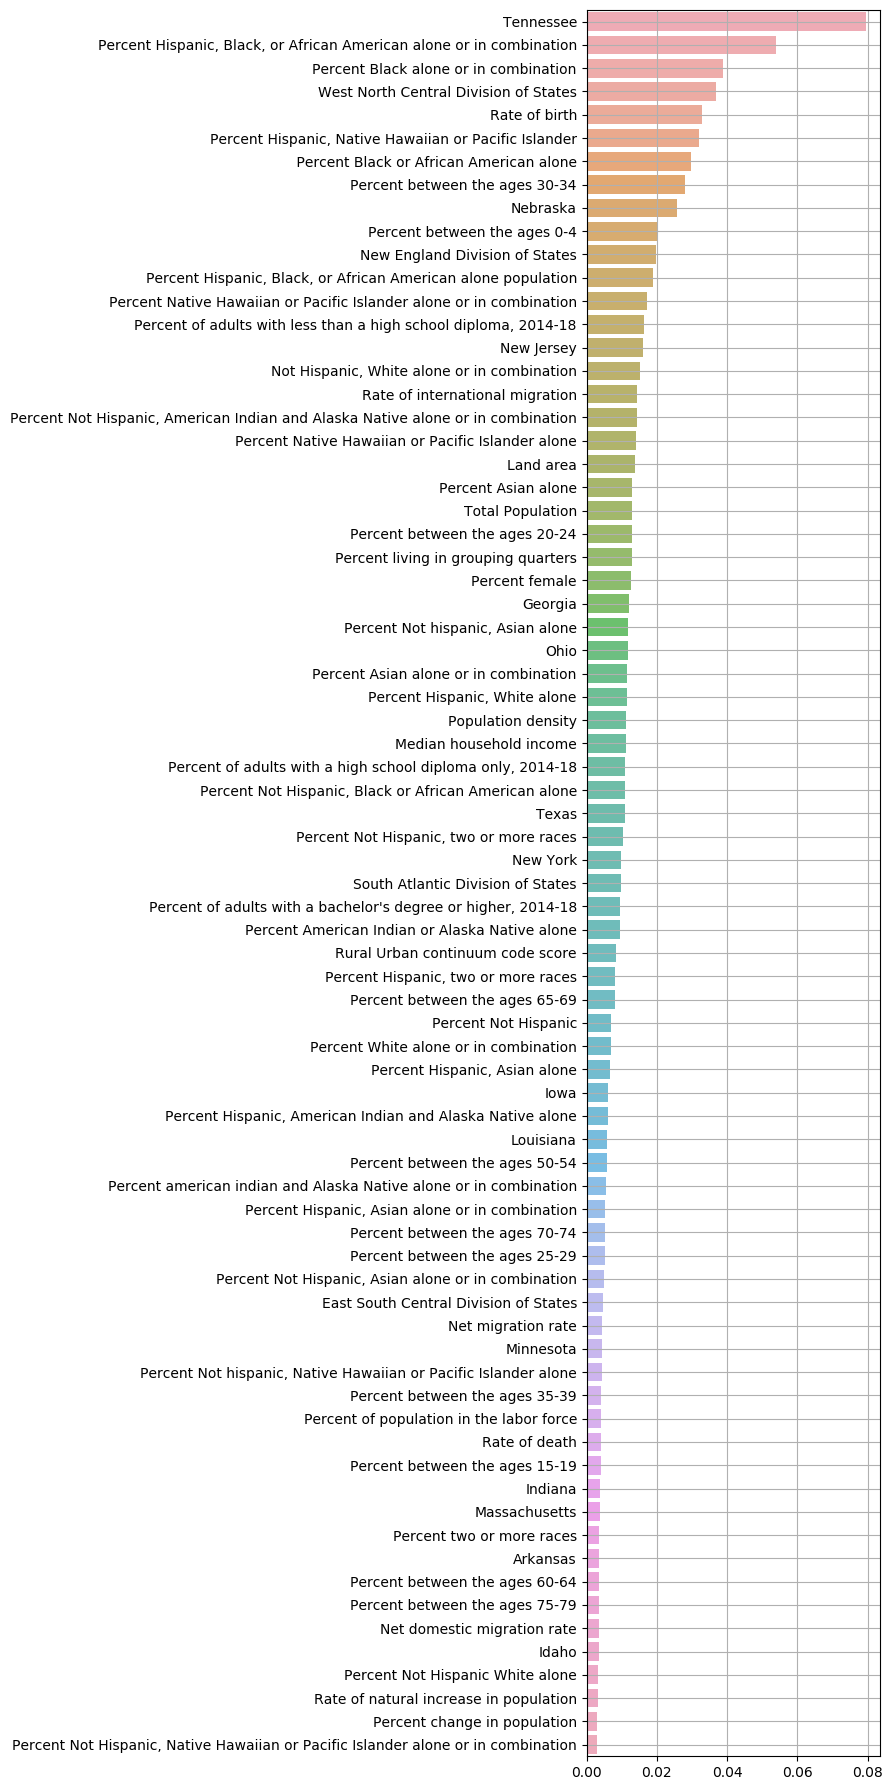

In [87]:
plot_features(75, features_all_mi)
plt.tight_layout()
plt.savefig('plots/xg_features.png', dpi=300)

In [78]:
features = {'Rural_urban_continuum_code_2013': 'Rural Urban continuum code score',
    'RBIRTH2018': 'Rate of birth',
            'NHNAC': 'Percent Not Hispanic, Native Hawaiian or Pacific Islander alone or in combination',

            'HTOM': 'Percent Hispanic, two or more races',
            'NPOPCHG_2018': 'Percent change in population',
            'RNATURALINC2018': 'Rate of natural increase in population',
            'RDOMESTICMIG2018': 'Net domestic migration rate',
            'sixty_sixtyfour': 'Percent between the ages 60-64',
            'sixtyfive_sixtynine': 'Percent between the ages 65-69',
            'seventyfive_seventynine': 'Percent between the ages 75-79',
            'TOM': 'Percent two or more races',
            'RNETMIG2018': 'Net migration rate',
            'HAAC': 'Percent Hispanic, Asian alone or in combination',
            'NHTOM': 'Percent Not Hispanic, two or more races',
            'HWA': 'Percent Hispanic, White alone',
            'HAA': 'Percent Hispanic, Asian alone',
            'twenty_twentyfour': 'Percent between the ages 20-24',
            'IA': 'Percent American Indian or Alaska Native alone',
            'fifteen_nineteen': 'Percent between the ages 15-19',
            'twentyfive_twentynine': 'Percent between the ages 25-29',
            'NHAAC': 'Percent Not Hispanic, Asian alone or in combination',
            '55': 'East South Central Division of States',
            
    '51': 'New England Division of States', 
 'HBAC':'Percent Hispanic, Black, or African American alone or in combination',
 'NAC': 'Percent Native Hawaiian or Pacific Islander alone or in combination', 
 'thirty_thirtyfour':'Percent between the ages 30-34',
 'AA':'Percent Asian alone',
 'AAC': 'Percent Asian alone or in combination',
 '53': 'West North Central Division of States',
 '54': 'South Atlantic Division of States',
 'NHAA': 'Percent Not hispanic, Asian alone',
 'NHNA': 'Percent Not hispanic, Native Hawaiian or Pacific Islander alone',
 'HBA': 'Percent Hispanic, Black, or African American alone population',
 'BA': ' Percent Black or African American alone',
 'GQESTIMATES2018': 'Percent living in grouping quarters',
 'IAC': 'Percent american indian and Alaska Native alone or in combination',
 'NHBA': 'Percent Not Hispanic, Black or African American alone',
 'NHWAC': 'Not Hispanic, White alone or in combination',
 'TOT_POP': 'Total Population',
 'zero_four': 'Percent between the ages 0-4', 'DENSITY': 'Population density', 
 'HNA': 'Percent Hispanic, Native Hawaiian or Pacific Islander',
'Civilian_labor_force_2018': 'Percent of population in the labor force',
'WAC': 'Percent White alone or in combination',
'fifty_fiftyfour':'Percent between the ages 50-54',
'NHIAC': 'Percent Not Hispanic, American Indian and Alaska Native alone or in combination',
'BAC': 'Percent Black alone or in combination',
'TOT_FEMALE': 'Percent female',
'Median_Household_Income_2018': 'Median household income',
'H': 'Percent Hispanic',
'NH': 'Percent Not Hispanic',
'RINTERNATIONALMIG2018': 'Rate of international migration',
'RDEATH2018': 'Rate of death', 'HIA': 'Percent Hispanic, American Indian and Alaska Native alone',
'NA': 'Percent Native Hawaiian or Pacific Islander alone',
'NHWA': 'Percent Not Hispanic White alone',
'med_age': 'Median Age',
'seventy_seventyfour': 'Percent between the ages 70-74',
'thirtyfive_thirtynine': 'Percent between the ages 35-39',
'LAND_AREA': 'Land area'}

In [97]:
df = pd.read_csv('../files/modeling_data/census_data_age_gend.csv')

In [98]:
df.columns

Index(['FIPS', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'TOT_POP', 'TOT_MALE',
       'WA', 'BA', 'IA',
       ...
       'Metro_2013',
       'Percent of adults with less than a high school diploma, 2014-18',
       'Percent of adults with a high school diploma only, 2014-18',
       'Percent of adults completing some college or associate's degree, 2014-18',
       'Percent of adults with a bachelor's degree or higher, 2014-18',
       'LAND_AREA', 'DENSITY', 'med_age', 'per_dem', 'per_gop'],
      dtype='object', length=104)

In [107]:
df.sort_values(by='TOT_POP_eightyfive_older', ascending=False)[['STNAME', 
            'CTYNAME', 'TOT_POP_eightyfive_older', 'TOT_MALE_twenty_twentyfour']][:40]

,STNAME,CTYNAME,TOT_POP_eightyfive_older,TOT_MALE_twenty_twentyfour
1805,New Mexico,Harding County,0.083969,0.400000
2014,North Dakota,McIntosh County,0.075435,0.507937
1698,Nebraska,Hooker County,0.074780,0.391304
906,Kansas,Decatur County,0.066527,0.508475
2030,North Dakota,Sheridan County,0.065975,0.580000
2389,South Dakota,Hand County,0.060392,0.524691
898,Kansas,Cheyenne County,0.060150,0.589552
1719,Nebraska,Pawnee County,0.060030,0.530435
1349,Minnesota,Lac qui Parle County,0.058576,0.481013
2404,South Dakota,McPherson County,0.058164,0.568421
